In [1]:
%pip install geobr
%pip install geopandas
%pip install h3
%pip install h3pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geobr
import lxml
import descartes
from shapely import wkt
import geopandas as gpd
import h3
from IPython.display import IFrame
import h3pandas

# DATUM

/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


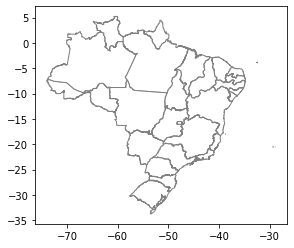

In [3]:
shape_br = gpd.read_file("/content/BR_UF_2020.shp")
shape_br.plot(facecolor = "white", edgecolor = "gray")

In [4]:
shape_br.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

https://geopandas.org/en/stable/docs/user_guide/projections.html

In [5]:
shape_br2 = shape_br.copy()
shape_br2 = shape_br2.to_crs("EPSG:3395")
shape_br2.crs

/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


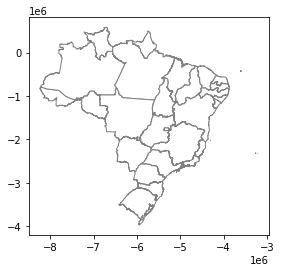

In [6]:
shape_br2.plot(facecolor = "white", edgecolor = "gray")

In [7]:
shape_br3 = shape_br.copy()
shape_br3 = shape_br3.to_crs("EPSG:32633")
shape_br3.crs

/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


<Projected CRS: EPSG:32633>
Name: WGS 84 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°E and 18°E, northern hemisphere between equator and 84°N, onshore and offshore. Austria. Bosnia and Herzegovina. Cameroon. Central African Republic. Chad. Congo. Croatia. Czechia. Democratic Republic of the Congo (Zaire). Gabon. Germany. Hungary. Italy. Libya. Malta. Niger. Nigeria. Norway. Poland. San Marino. Slovakia. Slovenia. Svalbard. Sweden. Vatican City State.
- bounds: (12.0, 0.0, 18.0, 84.0)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array in

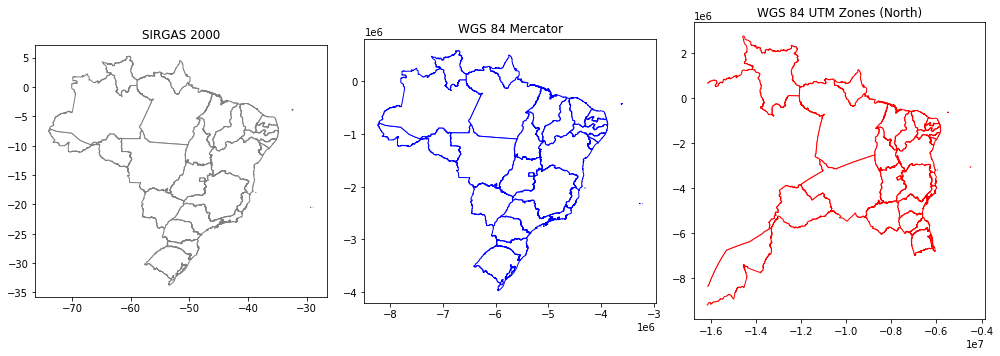

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

shape_br.plot(ax=ax1, facecolor = "white", edgecolor = "gray");
ax1.set_title("SIRGAS 2000");

shape_br2.plot(ax=ax2, facecolor = "white", edgecolor = "blue");
ax2.set_title("WGS 84 Mercator");
plt.tight_layout()

shape_br3.plot(ax=ax3, facecolor = "white", edgecolor = "red");
ax3.set_title("WGS 84 UTM Zones (North)");
plt.tight_layout()

# Join

In [9]:
shape_br.head(2)

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4..."
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


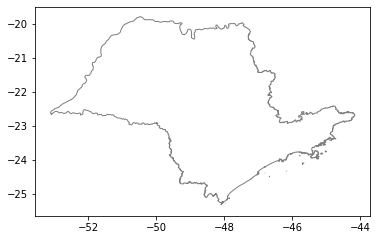

In [10]:
sp = shape_br[shape_br["SIGLA_UF"] == "SP"]
sp.plot(facecolor = "white", edgecolor = "gray")

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


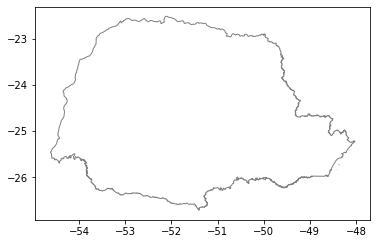

In [11]:
pr = shape_br[shape_br["SIGLA_UF"] == "PR"]
pr.plot(facecolor = "white", edgecolor = "gray")

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


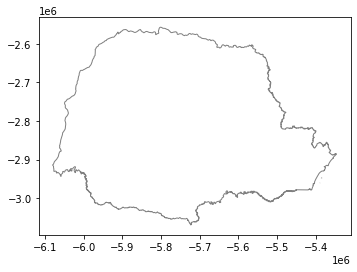

In [12]:
pr2 = shape_br2[shape_br2["SIGLA_UF"] == "PR"]
pr2.plot(facecolor = "white", edgecolor = "gray")

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


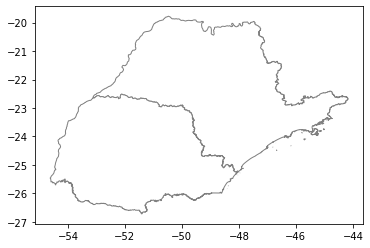

In [13]:
sppr = sp.append(pr)
sppr.plot(facecolor = "white", edgecolor = "gray")

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


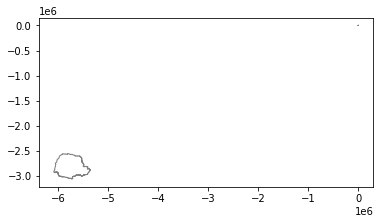

In [14]:
sppr2 = sp.append(pr2)
sppr2.plot(facecolor = "white", edgecolor = "gray")

# GeoBr

https://ipeagit.github.io/geobr/articles/python-intro/py-intro-to-geobr.html

# Listando as bases, shapes

In [15]:
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

# Extraindo a info

In [16]:
brasil = geobr.read_state(year=2020)
brasil

/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.23291 -5.94757, -48.23163 ..."
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ..."
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-42.91509 -6.64795, -42.91636 ..."
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ..."


# Centroid

In [17]:
brasil["lng"] = brasil["geometry"].centroid.x  
brasil["lat"] = brasil["geometry"].centroid.y
brasil

/usr/local/lib/python3.7/dist-packages/geopandas/array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
/usr/local/lib/python3.7/dist-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


,code_state,abbrev_state,name_state,code_region,name_region,geometry,lng,lat
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013...",-62.841977,-10.913217
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",-70.472930,-9.213271
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...",-64.653095,-4.154096
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...",-61.391906,2.082711
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...",-53.071488,-3.980420
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",-51.962021,1.447462
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.23291 -5.94757, -48.23163 ...",-48.331299,-10.148076
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ...",-45.287773,-5.072211
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-42.91509 -6.64795, -42.91636 ...",-42.970450,-7.389304
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ...",-39.615789,-5.093221


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-76.24759047174999, -26.59049941125, -35.70232894755, 7.222992030550001)

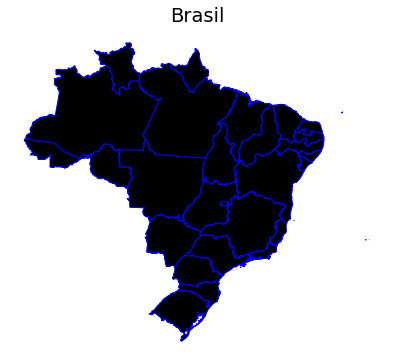

In [18]:
fig, ax = plt.subplots(figsize=(7, 7), dpi = 70)
brasil.plot(facecolor = "black", edgecolor = "blue", ax = ax)
ax.set_title("Brasil", fontsize = 20)
ax.axis("off")

#Add Label

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-76.24759047175, -26.590499411249997, -35.70232894755001, 7.222992030550001)

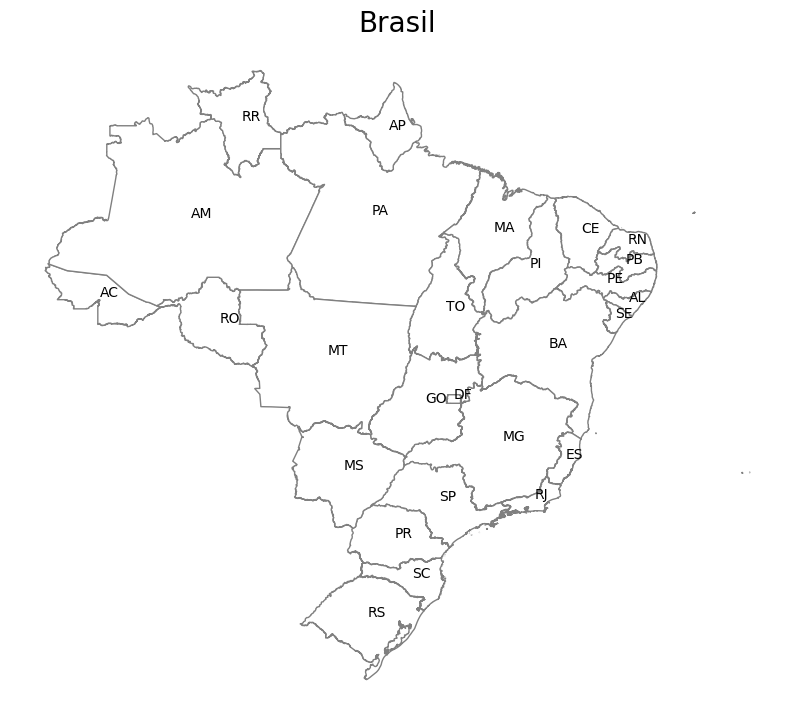

In [19]:
fig, ax = plt.subplots(figsize=(10, 10), dpi = 100)
brasil.plot(facecolor = "white", edgecolor = "gray", ax = ax)
for i in range(0, len(brasil["abbrev_state"])):
  ax.annotate(brasil.iloc[i,1], xytext=(brasil.iloc[i,6],brasil.iloc[i,7]), 
                                xy=(brasil.iloc[i,6],brasil.iloc[i,7]), size=10)
ax.set_title("Brasil", fontsize = 20)
ax.axis("off")

# Agregando infos

😡😡😡😡😡😡😡😡😡😡😡😡😡

In [22]:
df_idh = pd.read_csv("/content/idhm.csv", encoding = "latin1", sep = ";", decimal = ",")
df_idh.columns = df_idh.columns.str.replace(" ", "")
df_idh.columns

Index(['code_state', 'Territorialidade', 'PosiçãoIDHM', 'IDHM',
       'PosiçãoIDHMRenda', 'IDHMRenda', 'PosiçãoIDHMEducação', 'IDHMEducação',
       'PosiçãoIDHMLongevidade', 'IDHMLongevidade'],
      dtype='object')

## merge

In [25]:
brasil_idh = brasil.merge(df_idh, how = "inner", on = "code_state")
brasil_idh.head(3)

,code_state,abbrev_state,name_state,code_region,name_region,geometry,lng,lat,Territorialidade,PosiçãoIDHM,IDHM,PosiçãoIDHMRenda,IDHMRenda,PosiçãoIDHMEducação,IDHMEducação,PosiçãoIDHMLongevidade,IDHMLongevidade
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013...",-62.841977,-10.913217,Rondônia,18,0.725,23,0.776,16,0.703,13,0.699
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",-70.472930,-9.213271,Acre,20,0.719,12,0.821,18,0.682,22,0.664
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...",-64.653095,-4.154096,Amazonas,15,0.733,20,0.786,10,0.735,18,0.682


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-76.24759047175, -26.590499411249997, -35.70232894755, 7.222992030550001)

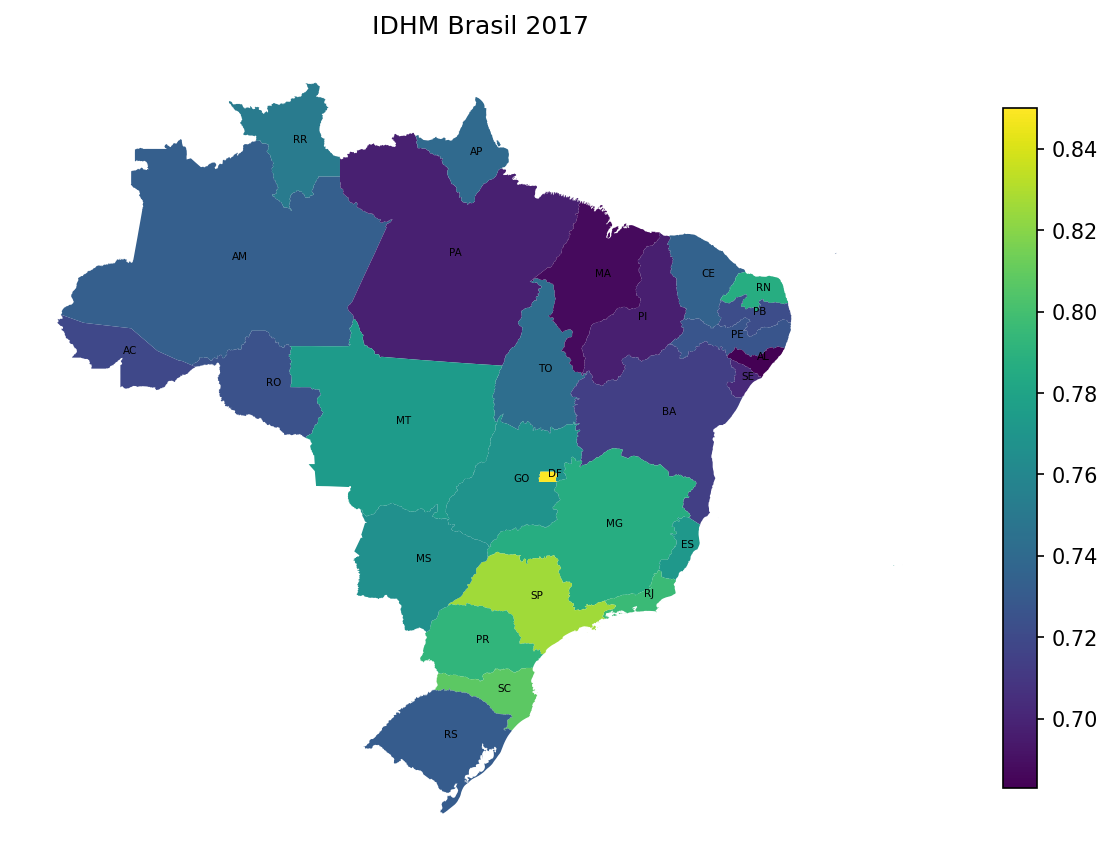

In [26]:
plt.rcParams.update({"font.size": 10})

fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

brasil_idh.plot(
    column = "IDHM",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax,
)
for i in range(0, len(brasil["abbrev_state"])):
  ax.annotate(brasil_idh.iloc[i,1], 
              xytext=(brasil_idh.iloc[i,6],brasil_idh.iloc[i,7]), 
              xy=(brasil_idh.iloc[i,6],brasil_idh.iloc[i,7]), size=5)
  
ax.set_title("IDHM Brasil 2017")
ax.axis("off")

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array in

Text(0.5, 1.0, 'IDHM Renda 2017')

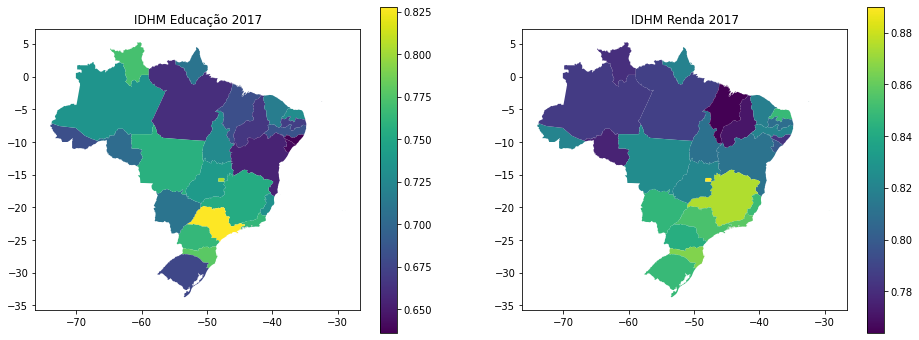

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

brasil_idh.plot(
    column = "IDHMEducação",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax = ax1,
)
brasil_idh.plot(
    column = "IDHMRenda",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax = ax2,
)
ax1.set_title("IDHM Educação 2017")
ax2.set_title("IDHM Renda 2017")

# Para todo o Brasil Setores e H3

In [ ]:
geobr.read_census_tract(year = 2010, code_tract = "PR")

In [28]:
ufs = ["AC","AL","AP","AM","BA","CE","DF","ES","GO","MA","MT","MS","MG","PA","PB",
       "PR","PE","PI","RJ","RN","RS","RO","RR","SC","SP","SE","TO"]

df_censo = []

for id, i in enumerate(ufs):
  census_tract = geobr.read_census_tract(year=2010, code_tract = i)
  census_tract["UF"] = i
  df_censo.append(census_tract)
  print(id,i)

final_df_censo = pd.concat(df_censo)
final_df_censo["lng"] = final_df_censo["geometry"].centroid.x  
final_df_censo["lat"] = final_df_censo["geometry"].centroid.y
final_df_censo = final_df_censo[["code_tract","code_muni","zone","name_muni","name_neighborhood",
                                 "name_district","UF","lng","lat","geometry"]]

/usr/local/lib/python3.7/dist-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


0 AC
1 AL
2 AP
3 AM
4 BA
5 CE
6 DF
7 ES
8 GO
9 MA
10 MT
11 MS
12 MG
13 PA
14 PB
15 PR
16 PE
17 PI
18 RJ
19 RN
20 RS
21 RO
22 RR
23 SC
24 SP
25 SE
26 TO


/usr/local/lib/python3.7/dist-packages/geopandas/array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
/usr/local/lib/python3.7/dist-packages/geopandas/geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


In [30]:
df_censo

[          code_tract    zone  code_muni        name_muni name_neighborhood  \
 0    120020305000030  URBANO  1200203.0  Cruzeiro Do Sul              None   
 1    120020305000031  URBANO  1200203.0  Cruzeiro Do Sul              None   
 2    120020305000032  URBANO  1200203.0  Cruzeiro Do Sul              None   
 3    120020305000033  URBANO  1200203.0  Cruzeiro Do Sul              None   
 4    120020305000034  URBANO  1200203.0  Cruzeiro Do Sul              None   
 ..               ...     ...        ...              ...               ...   
 895  120080705000017   RURAL  1200807.0       Porto Acre              None   
 896  120080705000018   RURAL  1200807.0       Porto Acre              None   
 897  120080705000019   RURAL  1200807.0       Porto Acre              None   
 898  120080705000020   RURAL  1200807.0       Porto Acre              None   
 899  120080705000021   RURAL  1200807.0       Porto Acre              None   
 
      code_neighborhood  code_subdistrict name_sub

In [31]:
final_df_censo

,code_tract,code_muni,zone,name_muni,name_neighborhood,name_district,UF,lng,lat,geometry
0,120020305000030,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.688866,-7.628594,"MULTIPOLYGON (((-72.69164 -7.63101, -72.69449 ..."
1,120020305000031,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.679722,-7.628807,"MULTIPOLYGON (((-72.68007 -7.63158, -72.68148 ..."
2,120020305000032,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.685895,-7.620394,"MULTIPOLYGON (((-72.68701 -7.62252, -72.68771 ..."
3,120020305000033,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.690483,-7.622802,"MULTIPOLYGON (((-72.69267 -7.62117, -72.68917 ..."
4,120020305000034,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.696441,-7.619033,"MULTIPOLYGON (((-72.70299 -7.61553, -72.70113 ..."
...,...,...,...,...,...,...,...,...,...,...
2110,172210705000014,1722107.0,RURAL,Xambioá,None,Xambioá,TO,-48.531306,-6.552851,"MULTIPOLYGON (((-48.57029 -6.42075, -48.56667 ..."
2111,172210705000015,1722107.0,RURAL,Xambioá,None,Xambioá,TO,-48.584299,-6.541010,"MULTIPOLYGON (((-48.59435 -6.53388, -48.57432 ..."
2112,172210705000016,1722107.0,RURAL,Xambioá,None,Xambioá,TO,-48.387928,-6.480301,"MULTIPOLYGON (((-48.41550 -6.51443, -48.42724 ..."
2113,172210705000017,1722107.0,RURAL,Xambioá,None,Xambioá,TO,-48.367349,-6.391679,"MULTIPOLYGON (((-48.37530 -6.34675, -48.37257 ..."


## 5.570 municípios
## 314 mil setores censitários.

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


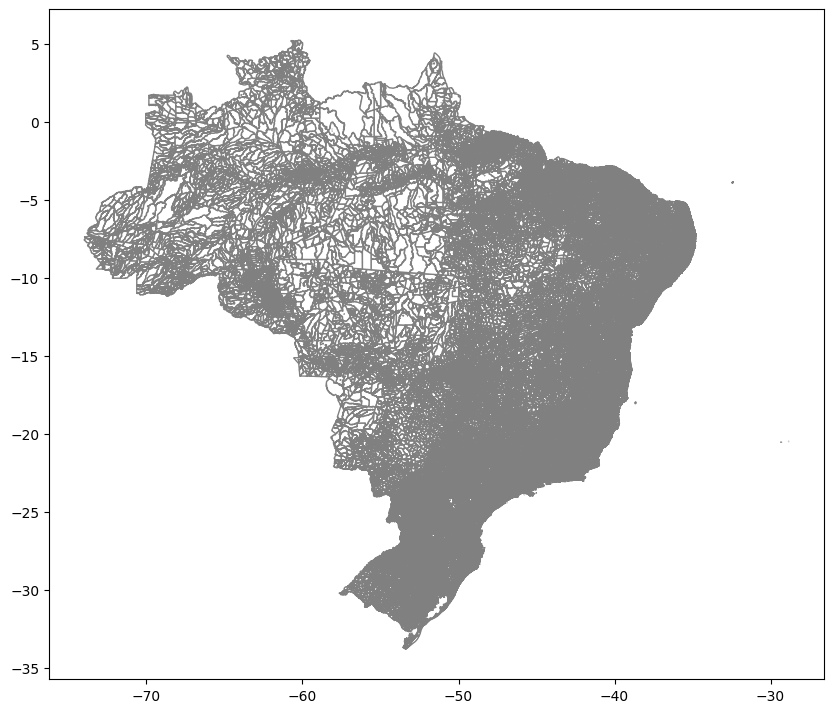

In [32]:
fig, ax = plt.subplots(figsize=(10, 10), dpi = 100)
final_df_censo.plot(facecolor = "white", edgecolor = "gray", ax=ax)

In [33]:
def geo_to_h3_3(row):
  return h3.geo_to_h3(lat = row.lat, lng = row.lng, resolution = 3)

def geo_to_h3_4(row):
  return h3.geo_to_h3(lat = row.lat, lng = row.lng, resolution = 4)

def geo_to_h3_5(row):
  return h3.geo_to_h3(lat = row.lat, lng = row.lng, resolution = 5)

final_df_censo["h3_3"] = final_df_censo.apply(geo_to_h3_3, axis = 1)
final_df_censo["h3_4"] = final_df_censo.apply(geo_to_h3_4, axis = 1)
final_df_censo["h3_5"] = final_df_censo.apply(geo_to_h3_5, axis = 1)

In [36]:
final_df_censo.head(3)

,code_tract,code_muni,zone,name_muni,name_neighborhood,name_district,UF,lng,lat,geometry,h3_3,h3_4,h3_5
0,120020305000030,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.688866,-7.628594,"MULTIPOLYGON (((-72.69164 -7.63101, -72.69449 ...",838b49fffffffff,848b493ffffffff,858b4927fffffff
1,120020305000031,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.679722,-7.628807,"MULTIPOLYGON (((-72.68007 -7.63158, -72.68148 ...",838b49fffffffff,848b493ffffffff,858b4927fffffff
2,120020305000032,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.685895,-7.620394,"MULTIPOLYGON (((-72.68701 -7.62252, -72.68771 ...",838b49fffffffff,848b493ffffffff,858b4927fffffff


#H3 4

In [34]:
gdf_h3 = final_df_censo.set_index("h3_4").h3.h3_to_geo_boundary()

In [38]:
gdf_h3.head(3)

,code_tract,code_muni,zone,name_muni,name_neighborhood,name_district,UF,lng,lat,geometry,h3_3,h3_5
h3_4,,,,,,,,,,,,
848b493ffffffff,120020305000030,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.688866,-7.628594,"POLYGON ((-72.65123 -7.48877, -72.85334 -7.636...",838b49fffffffff,858b4927fffffff
848b493ffffffff,120020305000031,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.679722,-7.628807,"POLYGON ((-72.65123 -7.48877, -72.85334 -7.636...",838b49fffffffff,858b4927fffffff
848b493ffffffff,120020305000032,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.685895,-7.620394,"POLYGON ((-72.65123 -7.48877, -72.85334 -7.636...",838b49fffffffff,858b4927fffffff


/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-76.22686640912114, -26.71963481937726, -36.03107115607576, 7.379087524393744)

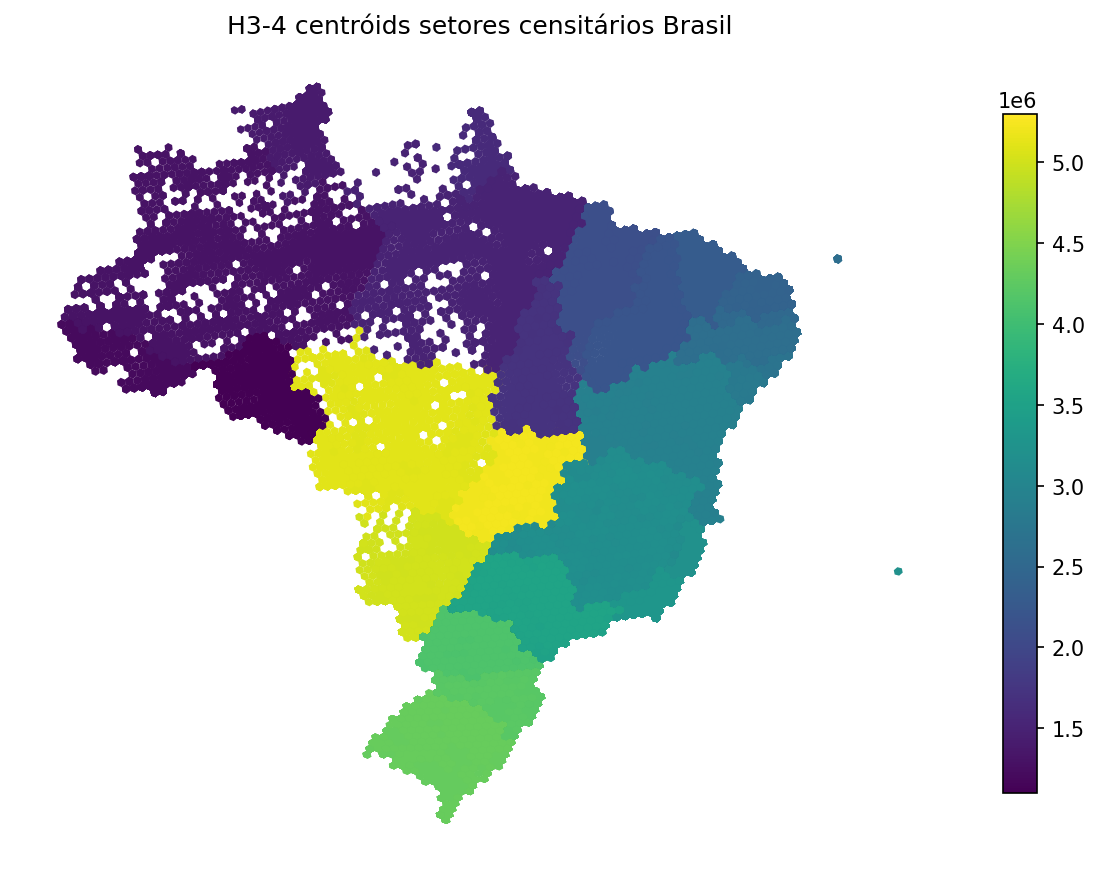

In [39]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

gdf_h3.plot(
    column = "code_muni",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax
)
  
ax.set_title("H3-4 centróids setores censitários Brasil")
ax.axis("off")

# H3 5

/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-76.08506572211908,
 -27.02522247263368,
 -35.813315601547416,
 7.286673544037668)

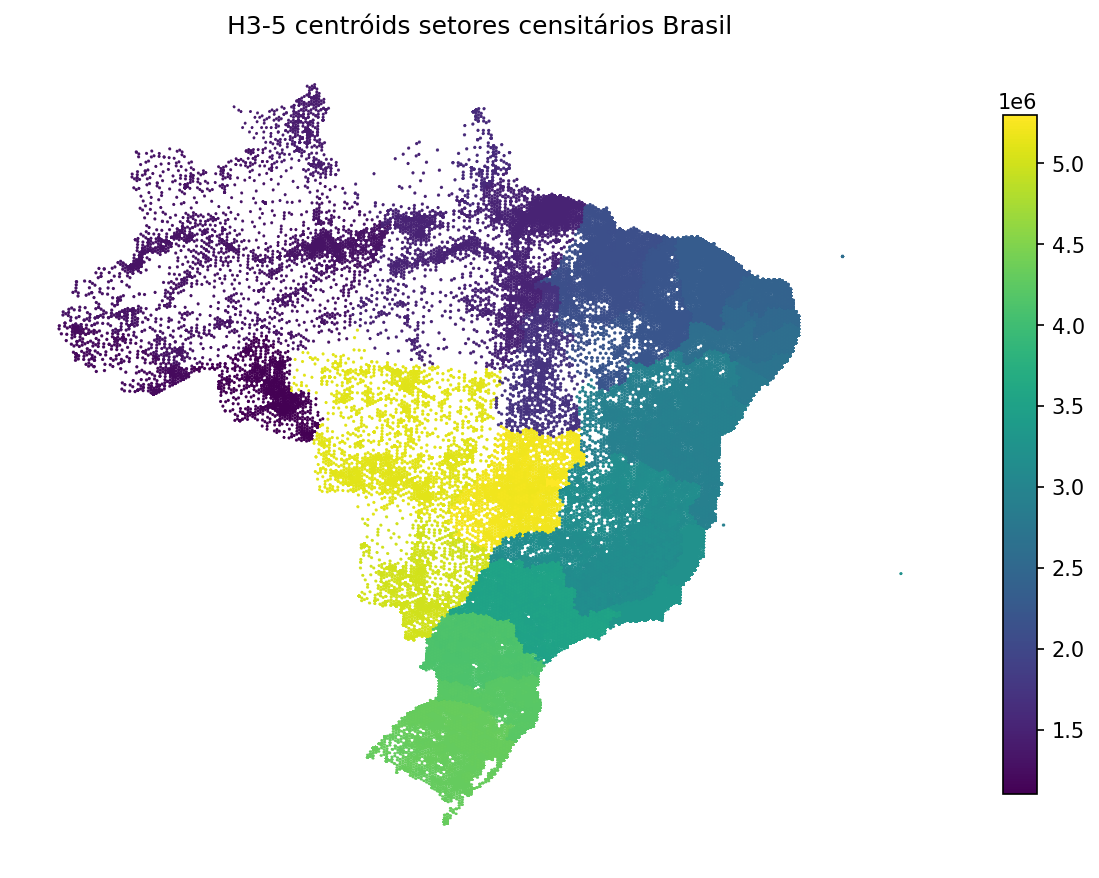

In [40]:
gdf_h3 = final_df_censo.set_index("h3_5").h3.h3_to_geo_boundary()

fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

gdf_h3.plot(
    column = "code_muni",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax
)
  
ax.set_title("H3-5 centróids setores censitários Brasil")
ax.axis("off")

# H3 3

/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-76.36624221993469,
 -25.969226650857866,
 -36.356893123277324,
 8.047098048574929)

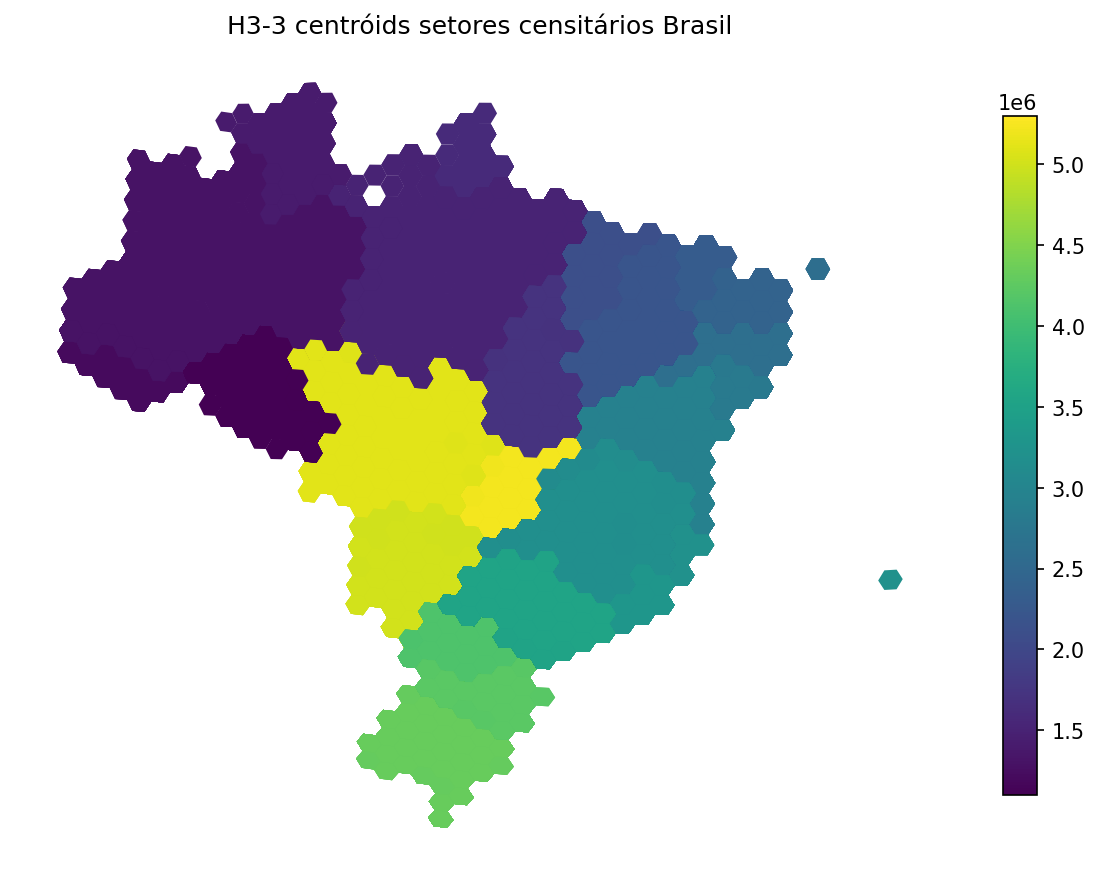

In [41]:
gdf_h3 = final_df_censo.set_index("h3_3").h3.h3_to_geo_boundary()

fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

gdf_h3.plot(
    column = "code_muni",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax
)
  
ax.set_title("H3-3 centróids setores censitários Brasil")
ax.axis("off")

# Sumariza H3

In [43]:
 final_df_censo["evento"] = np.random.randint(low = 0, high = 10, size = len(final_df_censo["name_muni"]))
 final_df_censo.head(3)

,code_tract,code_muni,zone,name_muni,name_neighborhood,name_district,UF,lng,lat,geometry,h3_3,h3_4,h3_5,evento
0,120020305000030,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.688866,-7.628594,"MULTIPOLYGON (((-72.69164 -7.63101, -72.69449 ...",838b49fffffffff,848b493ffffffff,858b4927fffffff,9
1,120020305000031,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.679722,-7.628807,"MULTIPOLYGON (((-72.68007 -7.63158, -72.68148 ...",838b49fffffffff,848b493ffffffff,858b4927fffffff,5
2,120020305000032,1200203.0,URBANO,Cruzeiro Do Sul,None,Cruzeiro Do Sul,AC,-72.685895,-7.620394,"MULTIPOLYGON (((-72.68701 -7.62252, -72.68771 ...",838b49fffffffff,848b493ffffffff,858b4927fffffff,9


In [44]:
def sumariza_h3(base, h3):
  sumar_h3 = (base
                     .groupby(h3)
                     .code_tract
                     .agg(list)
                     .to_frame("ids")
                     .reset_index()
           )

  sumar_ibge_censo_df = (base
                          .groupby(h3)
                          .agg(
                               cidade=("name_muni","max"),
                               uf=("UF","max"),
                               longitude_media=("lng","mean"),
                               latitude_media=("lat","mean"),
                               soma_evento=("evento","sum"),
                               max_evento=("evento","max"),
                          )
                          .reset_index()
                      )
  return(sumar_ibge_censo_df,sumar_h3 )

In [45]:
final_df_censo_h3_3	=	sumariza_h3(final_df_censo, "h3_3")

In [46]:
final_df_censo_h3_3[0]

,h3_3,cidade,uf,longitude_media,latitude_media,soma_evento,max_evento
0,835f14fffffffff,Oiapoque,AP,-52.329120,3.167272,0,0
1,835f16fffffffff,Oiapoque,AP,-51.740852,3.729241,154,9
2,835f20fffffffff,Oriximiná,PA,-57.107506,0.548494,4,4
3,835f22fffffffff,Óbidos,PA,-55.822491,1.448120,14,7
4,835f25fffffffff,Oriximiná,PA,-58.132045,0.074317,2,2
...,...,...,...,...,...,...,...
712,83c2d6fffffffff,Santa Vitória Do Palmar,RS,-53.366492,-33.576219,478,9
713,83c2d8fffffffff,Sant'ana Do Livramento,RS,-55.945626,-30.985123,18,7
714,83c2d9fffffffff,Barra Do Quaraí,RS,-57.427612,-30.216529,23,6
715,83c2dafffffffff,Sant'ana Do Livramento,RS,-55.238366,-30.897720,1331,9


In [47]:
final_df_censo_h3_3[1]["len_ids"] = final_df_censo_h3_3[1]["ids"].str.len()
final_df_censo_h3_3[1]

,h3_3,ids,len_ids
0,835f14fffffffff,[160050110000002],1
1,835f16fffffffff,"[160050105000001, 160050105000002, 16005010500...",31
2,835f20fffffffff,[150530405000051],1
3,835f22fffffffff,"[150510605000046, 150530405000053]",2
4,835f25fffffffff,[150530405000044],1
...,...,...,...
712,83c2d6fffffffff,"[430543905000001, 430543905000002, 43054390500...",111
713,83c2d8fffffffff,"[431710307000001, 431710307000002, 43171030700...",4
714,83c2d9fffffffff,"[430187505000001, 430187505000002, 43018750500...",7
715,83c2dafffffffff,"[430660105060015, 430660105060016, 43066010506...",300


/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-76.36624221993469,
 -25.969226650857866,
 -36.356893123277324,
 8.047098048574929)

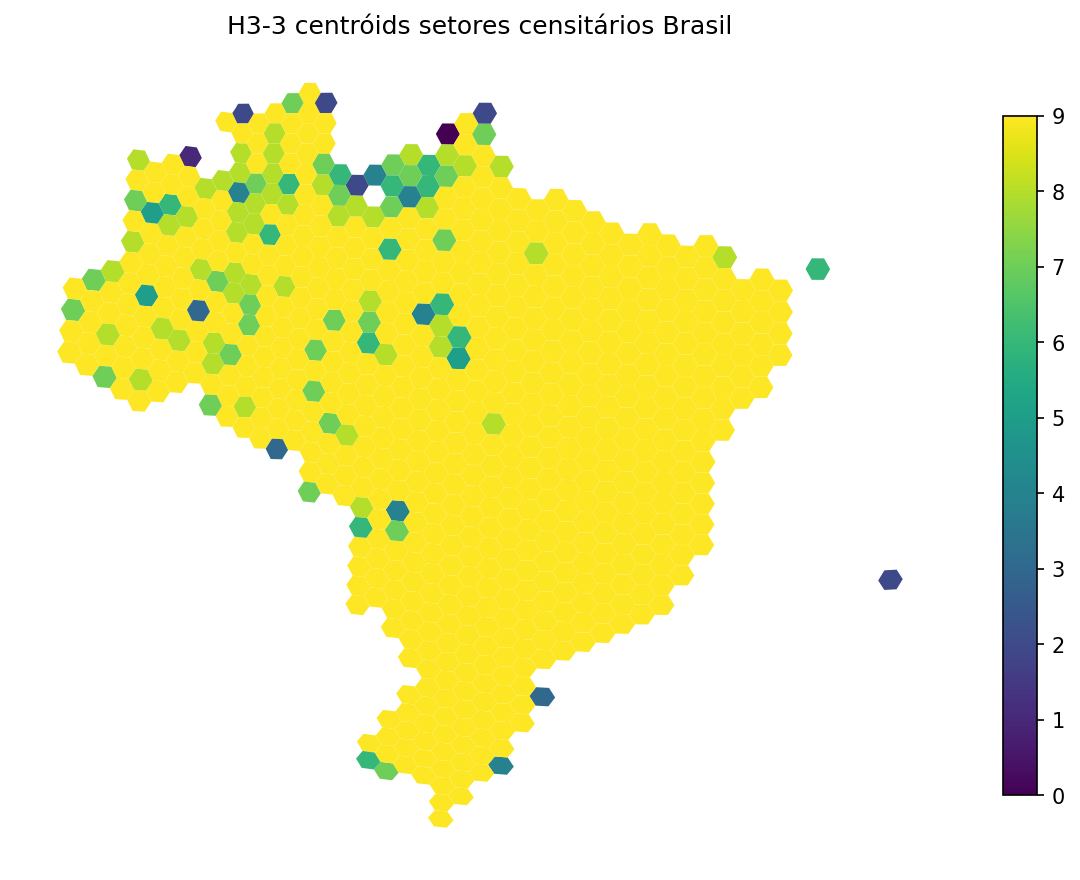

In [48]:
df_censo_h3_3 = final_df_censo_h3_3[0].set_index("h3_3").h3.h3_to_geo_boundary()

fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

df_censo_h3_3.plot(
    column = "max_evento",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax
)
  
ax.set_title("H3-3 centróids setores censitários Brasil")
ax.axis("off")

/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


(-76.36624221993469,
 -25.969226650857866,
 -36.356893123277324,
 8.047098048574929)

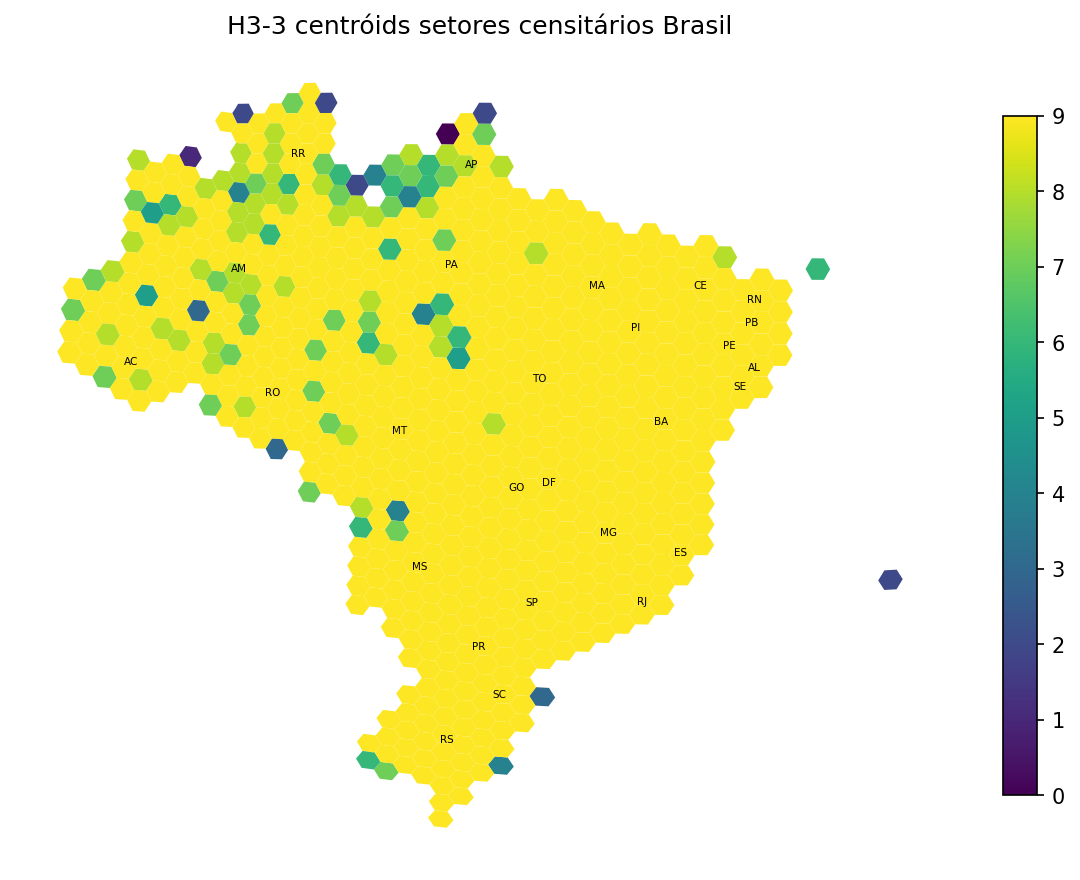

In [49]:
df_censo_h3_3 = final_df_censo_h3_3[0].set_index("h3_3").h3.h3_to_geo_boundary()

fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

df_censo_h3_3.plot(
    column = "max_evento",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax
)
for i in range(0, len(brasil["abbrev_state"])):
  ax.annotate(brasil_idh.iloc[i,1], 
              xytext=(brasil_idh.iloc[i,6],brasil_idh.iloc[i,7]), 
              xy=(brasil_idh.iloc[i,6],brasil_idh.iloc[i,7]), size=5)
  
ax.set_title("H3-3 centróids setores censitários Brasil")
ax.axis("off")